***Proyecto 1:*** Análisis de Sentimiento en Twitter

***Descripción del demo:***
Este proyecto realiza un análisis de sentimiento sobre un conjunto de tweets utilizando procesamiento de lenguaje natural (NLP) con la librería TextBlob. El objetivo es predecir si un texto es positivo, negativo o neutral y comparar estas predicciones con las etiquetas originales provistas en el dataset.

***Tecnologías:***
snscrape: para obtener tweets sin necesidad de una API.

Python

1. Pandas

2. TextBlob

3. Seaborn / Matplotlib

4. scikit-learn (para matriz de confusión)

5. Google Colab (para ejecución sin configuración local)

# ***Demo***

🔧 INSTALACIÓN DE LIBRERÍAS

In [1]:
!pip install -q textblob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

📦 IMPORTACIÓN DE LIBRERÍAS

In [2]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

📁 CARGA DEL ARCHIVO CSV

In [3]:
print("📤 Sube tu archivo CSV con las columnas: textID, text, selected_text, sentiment")
uploaded = files.upload()  # interfaz para subir archivo

# Detectar nombre del archivo cargado
import io
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))
df = df.dropna(subset=["text"])  # por si hay valores nulos

print(f"✅ Archivo cargado: {file_name}")
print(f"Número de tweets: {len(df)}")

📤 Sube tu archivo CSV con las columnas: textID, text, selected_text, sentiment


Saving train.csv to train.csv
✅ Archivo cargado: train.csv
Número de tweets: 27480


 🤖 ANÁLISIS DE SENTIMIENTO

In [4]:
def obtener_sentimiento(texto):
    blob = TextBlob(texto)
    polaridad = blob.sentiment.polarity
    if polaridad > 0.1:
        return "positive"
    elif polaridad < -0.1:
        return "negative"
    else:
        return "neutral"

df["predicted_sentiment"] = df["text"].apply(obtener_sentimiento)


📊 VISUALIZACIÓN DE RESULTADOS

<ipython-input-5-0ab61e64f4ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")
<ipython-input-5-0ab61e64f4ba>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="predicted_sentiment", data=df, palette="Set1")


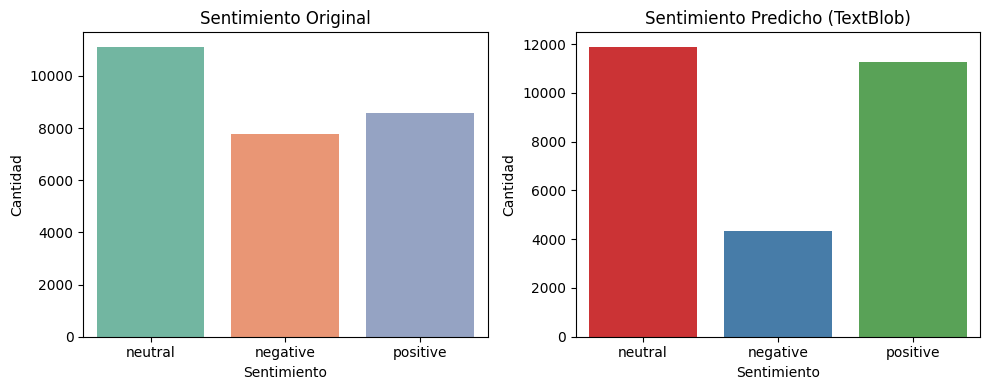

In [5]:
plt.figure(figsize=(10, 4))

# Sentimiento original (si se quiere comparar)
plt.subplot(1, 2, 1)
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentimiento Original")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")

# Sentimiento estimado por TextBlob
plt.subplot(1, 2, 2)
sns.countplot(x="predicted_sentiment", data=df, palette="Set1")
plt.title("Sentimiento Predicho (TextBlob)")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")

plt.tight_layout()
plt.show()

 📊 MATRIZ DE CONFUSIÓN (opcional)

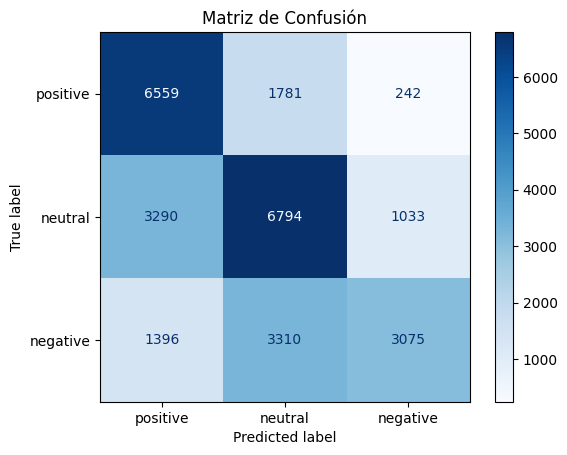

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if "sentiment" in df.columns:
    cm = confusion_matrix(df["sentiment"], df["predicted_sentiment"], labels=["positive", "neutral", "negative"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "neutral", "negative"])
    disp.plot(cmap="Blues")
    plt.title("Matriz de Confusión")
    plt.show()


📘 INTERPRETACIÓN DE RESULTADOS

In [7]:
print("\n🧠 EXPLICACIÓN DE LOS RESULTADOS:\n")
print("🔹 En el gráfico de la izquierda (Sentimiento Original), se muestra la cantidad de tweets clasificados por humanos como positivos, negativos o neutrales.")
print("🔹 En el gráfico de la derecha (Sentimiento Predicho), se observa cómo TextBlob clasificó esos mismos tweets.")
print("🔹 La comparación permite ver si el modelo tiende a sobreestimar un tipo de sentimiento (por ejemplo, clasificar muchos tweets como neutrales).")

if "sentiment" in df.columns:
    print("\n📊 La matriz de confusión muestra cómo se alinean las predicciones con las etiquetas originales:")
    print("    - La diagonal principal representa las predicciones correctas.")
    print("    - Los valores fuera de la diagonal indican errores.")
    print("    - Por ejemplo, si hay muchos tweets positivos clasificados como neutrales, eso aparecerá fuera de la diagonal.")
    print("\n✅ Este análisis es útil para validar la efectividad del modelo y explorar mejoras con modelos más avanzados (como BERT).")



🧠 EXPLICACIÓN DE LOS RESULTADOS:

🔹 En el gráfico de la izquierda (Sentimiento Original), se muestra la cantidad de tweets clasificados por humanos como positivos, negativos o neutrales.
🔹 En el gráfico de la derecha (Sentimiento Predicho), se observa cómo TextBlob clasificó esos mismos tweets.
🔹 La comparación permite ver si el modelo tiende a sobreestimar un tipo de sentimiento (por ejemplo, clasificar muchos tweets como neutrales).

📊 La matriz de confusión muestra cómo se alinean las predicciones con las etiquetas originales:
    - La diagonal principal representa las predicciones correctas.
    - Los valores fuera de la diagonal indican errores.
    - Por ejemplo, si hay muchos tweets positivos clasificados como neutrales, eso aparecerá fuera de la diagonal.

✅ Este análisis es útil para validar la efectividad del modelo y explorar mejoras con modelos más avanzados (como BERT).


💾 OPCIONAL: GUARDAR COMO CSV

In [ ]:
# df.to_csv("tweets_con_sentimiento.csv", index=False)